In [26]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt

sns.set_style(style = 'darkgrid')

In [27]:
df=pd.read_csv("netflix_titles.csv")

In [360]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,timeStamp,day_added,main_produce,rating_group
0,s1,TV Show,3%,missing,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August,2020-08-14,4,Brazil,R
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December,2016-12-23,4,Mexico,R
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December,2018-12-20,3,Singapore,R
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November,2017-11-16,3,United States,PG-13
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,January,2020-01-01,2,United States,PG-13


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [29]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [30]:
df.type.value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

## Data Preparation

#### Imputation
Found the missing values in director,cast,country,date_added and rating (Almost 80% are in 'director' column)
- Use the 'missing' keyword filling in director and cast columns
- Use mode replacement for date_added, rating and country

In [31]:
df['country']=df['country'].fillna(df['country'].mode()[0])
df['rating']=df['rating'].fillna(df['rating'].mode()[0])
df['date_added']=df['date_added'].fillna(df['date_added'].mode()[0])

df['director'].fillna('missing',inplace=True)
df['cast'].fillna('missing',inplace=True)

**Time**
- Split date_added column ,which is timing data, to day of week and months 

In [32]:
df['month_added']=df['date_added'].apply(lambda date:date.split(' ')[0])

df['timeStamp']=pd.to_datetime(df['date_added'])
df['day_added']=df['timeStamp'].apply(lambda time:time.dayofweek) #0:monday


**Country**
- Select the first country as main-producing country 

In [165]:
df['main_produce'] = df['country'].apply(lambda x: x.lstrip(' ').split(',')[0])

In [68]:
df['main_produce'] = df['country'].apply(lambda x: x.lstrip(' ').split(',')[0])

country_count = {}
for main in df['main_produce']:    
    if main in country_count.keys():
        country_count[main]+=1
    else: country_count[main]=1
country_nf = dict(sorted(country_count.items(),key=lambda items:items[1],reverse=True))


- Create two dateframe as Series and Movies 

In [166]:
series = df[df['type']=='TV Show'].drop(['show_id','type'],axis=1)
movies = df[df['type']=='Movie'].drop(['show_id','type'],axis=1)

**Cast**

In [167]:
series_cast_list =[]
for cast in series.cast:
    line = cast.split(',')
    for cast_split in line:
        series_cast_list.append(cast_split.strip())
        
series_cast_count ={}
for name in series_cast_list:
    if name in series_cast_count.keys():
        series_cast_count[name]+=1
    else:
        series_cast_count[name]=1

series_cast=dict(sorted(series_cast_count.items(),key=lambda items:items[1],reverse=True))

In [168]:
movies_cast_list =[]
for cast in movies.cast:
    line = cast.split(',')
    for cast_split in line:
        movies_cast_list.append(cast_split.strip())
        
movies_cast_count ={}
for name in movies_cast_list:
    if name in movies_cast_count.keys():
        movies_cast_count[name]+=1
    else:
        movies_cast_count[name]=1

movies_cast=dict(sorted(movies_cast_count.items(),key=lambda items:items[1],reverse=True))

#### Director
Some audiences watch films by the director's name.Collect and count by looping.

In [169]:
df[df.director=='missing'].groupby('type').count()['director']

type
Movie       163
TV Show    2226
Name: director, dtype: int64

There's a lot missing value in TV Shows' director

In [170]:
director_list =[]
for director in df.director:
    line = director.split(',')
    for director_split in line:
        director_list.append(director_split.strip())
director_count ={}
for name in director_list:
    if name in director_count.keys():
        director_count[name]+=1
    else:
        director_count[name]=1
      
director_nf=dict(sorted(director_count.items(),key=lambda items:items[1],reverse=True))

## Visualization

Netflix provides two types of streaming service ,Movies 5377 (69.05%) and TV Shows as known as Series 2410 (30.95%).

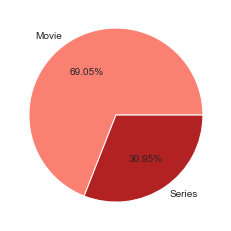

In [171]:
label='Movie','Series'
plt.pie(df['type'].value_counts(),labels=label,autopct='%1.2f%%',colors=['#FA8072','#B22222'])
plt.show()

### Content Ratings

Follow Motion picture content rating system

G : No restrictions,Suitable for all ages <br />
PG: No restrictions with Parental guidance<br />
PG-13 : No restrictions but not recommended for a younger audience(over 13 years)<br />
R : Restricted,require accompanying parent(over 17 years )<br />
NC-17 : Prohibitive,Exclusively for older audience (no one 17 and under admitted)<br /><br />

Re-group<br />
1.G : TV-G,TV-Y<br />
2.PG : PG,TV-PG,TV-Y7,TV-Y7-FV<br />
3.PG-13 : PG-13,TV-14<br />
4.R : R , TV-MA<br />
5.NC-17 : NC-17,UR,NR<br /><br />

Ref.<br />
https://atlascinemas.net/ratings.html<br />
https://atlascinemas.net/ratings.html


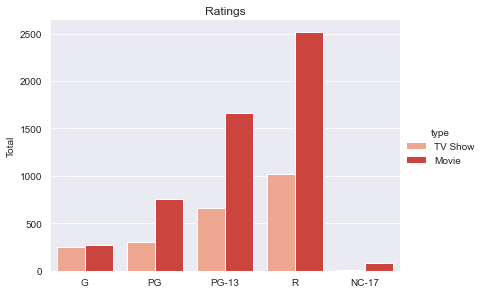

In [291]:
df['rating_group']=df['rating'].replace({'TV-G':'G','TV-Y':'G','TV-PG':'PG','TV-Y7-FV':'PG','TV-14':'PG-13','TV-MA':'R','UR':'NC-17','NR':'NC-17'})
rating_order=['G','PG','PG-13','R','NC-17']
g=sns.catplot(x='rating_group',data=df,kind='count',palette='Reds',hue='type',order=rating_order,height=4,aspect=1.4)
g.set(title="Ratings",xlabel=None, 
       ylabel="Total")
plt.show()

### Release time

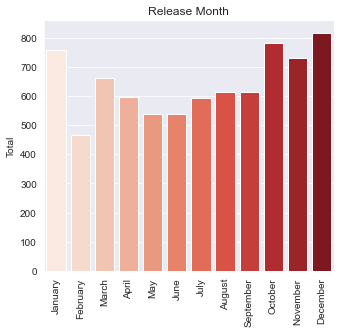

In [292]:
order_m=['January','February','March','April','May','June','July','August','September','October','November','December']
g=sns.catplot(x='month_added',data=df,kind='count',palette='Reds',height=4,aspect=1.2,order=order_m)
g.set_xticklabels(rotation=90)
g.set(xlabel=None,ylabel="Total",title='Release Month')


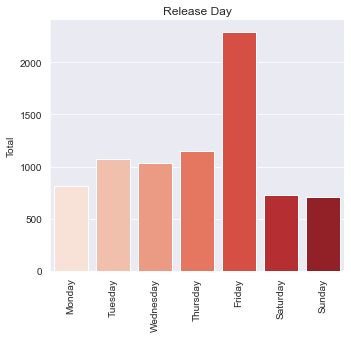

In [294]:
g=sns.catplot(x='day_added',data=df,kind='count',palette='Reds',height=4,aspect=1.2)
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
g.set_xticklabels(days,rotation=90)
g.set(xlabel=None,ylabel="Total",title='Release Day')


### Country

In [314]:
movies_type=movies.groupby('main_produce').count().reset_index()[['main_produce','title']]
movies_type=movies_type.sort_values(by=['title'],ascending=False)[0:10]


In [315]:
series_type=series.groupby('main_produce').count().reset_index()[['main_produce','title']]
series_type=series_type.sort_values(by=['title'],ascending=False)[0:10]


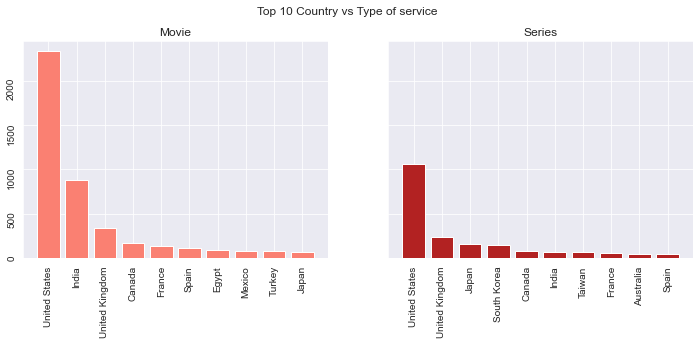

In [352]:
fig,(ax0,ax1)=plt.subplots(nrows=1,ncols=2,sharey=True,figsize=(12,4))
ax0.bar(movies_type.main_produce,movies_type.title,color='#FA8072')
ax0.tick_params(labelrotation=90)
ax0.set_title('Movie')


ax1.bar(series_type.main_produce,series_type.title,color='#B22222')
ax1.tick_params(labelrotation=90)
ax1.set_title('Series')
fig.suptitle('Top 10 Country vs Type of service',y=1)
plt.show()

### Cast

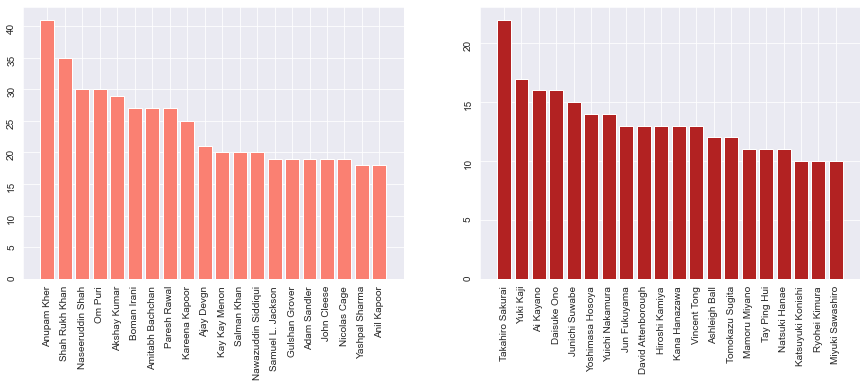

In [354]:
fig = plt.figure(figsize=(15,5))
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)
ax1.bar(list(series_cast.keys())[1:21], list(series_cast.values())[1:21], color='#B22222')
ax1.tick_params(labelrotation=90)


ax0.bar(list(movies_cast.keys())[1:21], list(movies_cast.values())[1:21], color='#FA8072')
ax0.tick_params(labelrotation=90)

plt.show()


**Directors**

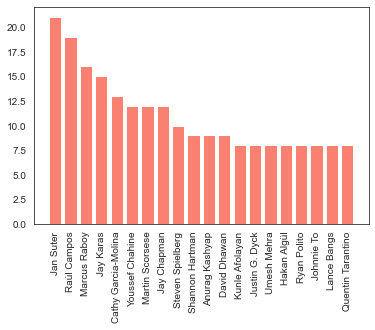

In [357]:
sns.set_style(style = 'white')
plt.bar(list(director_nf.keys())[1:21], list(director_nf.values())[1:21], color='#FA8072')
plt.xticks(rotation='vertical')
plt.show()

## TO BE CONTINUE...